Data Preprocessing

In [2]:
import pandas as pd
import requests
from datetime import datetime

# Alpha Vantage API key
API_KEY = "NNIVHEQ1P9381USE"  # Replace with your API key

class StockDataPipeline:
    def __init__(self, symbol, api_key):
        self.symbol = symbol
        self.api_key = api_key
        self.raw_data = None
        self.processed_data = None

    def collect_stock_data(self):
        """
        Step 1: Collects stock data from Alpha Vantage API.
        """
        print(f"[Step 1] Collecting data for {self.symbol}...")
        url = "https://www.alphavantage.co/query"
        params = {
            "function": "TIME_SERIES_DAILY",
            "symbol": self.symbol,
            "apikey": self.api_key
        }
        response = requests.get(url, params=params)
        data = response.json().get("Time Series (Daily)", {})
        stock_data = pd.DataFrame.from_dict(data, orient="index")
        stock_data.columns = ["open", "high", "low", "close", "volume"]
        stock_data.index = pd.to_datetime(stock_data.index)
        self.raw_data = stock_data.apply(pd.to_numeric)
        print("[Step 1] Data collection completed.")
        return self.raw_data

    def process_data(self):
        """
        Step 2: Processes the collected stock data.
        """
        if self.raw_data is None:
            raise ValueError("No raw data available. Please run `collect_stock_data` first.")
        print("[Step 2] Processing data...")
        self.processed_data = self.raw_data.copy()
        self.processed_data["moving_avg_30"] = self.processed_data["close"].rolling(window=30).mean()
        self.processed_data.dropna(inplace=True)
        print("[Step 2] Data processing completed.")
        return self.processed_data

    def analyze_and_recommend(self):
        """
        Step 3: Analyzes processed data and generates recommendations.
        """
        if self.processed_data is None:
            raise ValueError("No processed data available. Please run `process_data` first.")
        print("[Step 3] Generating recommendations...")
        last_close = self.processed_data["close"].iloc[-1]
        last_moving_avg = self.processed_data["moving_avg_30"].iloc[-1]
        recommendation = "Buy" if last_close > last_moving_avg else "Hold"

        recommendation_summary = {
            "symbol": self.symbol,
            "date": datetime.now(),
            "recommendation": recommendation,
            "last_close": last_close,
            "last_moving_avg": last_moving_avg
        }
        print("[Step 3] Recommendation generated:")
        for key, value in recommendation_summary.items():
            print(f"{key}: {value}")
        return recommendation_summary

    def run_pipeline(self):
        """
        Executes all steps of the pipeline in sequence.
        """
        self.collect_stock_data()
        self.process_data()
        return self.analyze_and_recommend()


# Running the Pipeline
if __name__ == "__main__":
    STOCK_SYMBOL = "AAPL"  # Stock symbol to track
    pipeline = StockDataPipeline(STOCK_SYMBOL, API_KEY)
    recommendation = pipeline.run_pipeline()


[Step 1] Collecting data for AAPL...
[Step 1] Data collection completed.
[Step 2] Processing data...
[Step 2] Data processing completed.
[Step 3] Generating recommendations...
[Step 3] Recommendation generated:
symbol: AAPL
date: 2024-11-20 10:55:11.085108
recommendation: Hold
last_close: 216.75
last_moving_avg: 221.75966666666667


Feature eng

In [3]:
import pandas as pd
import requests
from datetime import datetime

# Alpha Vantage API key
API_KEY = "NNIVHEQ1P9381USE"  # Replace with your API key

class StockDataPipeline:
    def __init__(self, symbol, api_key):
        self.symbol = symbol
        self.api_key = api_key
        self.raw_data = None
        self.processed_data = None
        self.featured_data = None

    def collect_stock_data(self):
        """
        Step 1: Collects stock data from Alpha Vantage API.
        """
        print(f"[Step 1] Collecting data for {self.symbol}...")
        url = "https://www.alphavantage.co/query"
        params = {
            "function": "TIME_SERIES_DAILY",
            "symbol": self.symbol,
            "apikey": self.api_key
        }
        response = requests.get(url, params=params)
        data = response.json().get("Time Series (Daily)", {})
        stock_data = pd.DataFrame.from_dict(data, orient="index")
        stock_data.columns = ["open", "high", "low", "close", "volume"]
        stock_data.index = pd.to_datetime(stock_data.index)
        self.raw_data = stock_data.apply(pd.to_numeric)
        print("[Step 1] Data collection completed.")
        return self.raw_data

    def process_data(self):
        """
        Step 2: Processes the collected stock data.
        """
        if self.raw_data is None:
            raise ValueError("No raw data available. Please run collect_stock_data first.")
        print("[Step 2] Processing data...")
        self.processed_data = self.raw_data.copy()
        self.processed_data["moving_avg_30"] = self.processed_data["close"].rolling(window=30).mean()
        self.processed_data.dropna(inplace=True)
        print("[Step 2] Data processing completed.")
        return self.processed_data

    def feature_engineering(self):
        """
        Step 3: Feature engineering to extract additional insights from the data.
        """
        if self.processed_data is None:
            raise ValueError("No processed data available. Please run process_data first.")
        print("[Step 3] Performing feature engineering...")
        self.featured_data = self.processed_data.copy()
        
        # Additional features
        self.featured_data["price_change"] = self.featured_data["close"] - self.featured_data["open"]
        self.featured_data["volatility"] = self.featured_data["high"] - self.featured_data["low"]
        self.featured_data["daily_return"] = self.featured_data["close"].pct_change()  # Percent change
        self.featured_data["volume_change"] = self.featured_data["volume"].pct_change()  # Volume change

        # Add labels for easier interpretation
        self.featured_data["trend"] = self.featured_data["price_change"].apply(lambda x: "Up" if x > 0 else "Down")
        self.featured_data.dropna(inplace=True)  # Drop rows with NaNs due to pct_change
        print("[Step 3] Feature engineering completed.")
        return self.featured_data

    def analyze_and_recommend(self):
        """
        Step 4: Analyzes processed data and generates recommendations.
        """
        if self.featured_data is None:
            raise ValueError("No featured data available. Please run feature_engineering first.")
        print("[Step 4] Generating recommendations...")
        last_close = self.featured_data["close"].iloc[-1]
        last_moving_avg = self.featured_data["moving_avg_30"].iloc[-1]
        recommendation = "Buy" if last_close > last_moving_avg else "Hold"

        recommendation_summary = {
            "symbol": self.symbol,
            "date": datetime.now(),
            "recommendation": recommendation,
            "last_close": last_close,
            "last_moving_avg": last_moving_avg,
            "last_price_change": self.featured_data["price_change"].iloc[-1],
            "last_volatility": self.featured_data["volatility"].iloc[-1],
            "last_daily_return": self.featured_data["daily_return"].iloc[-1]
        }
        print("[Step 4] Recommendation generated:")
        for key, value in recommendation_summary.items():
            print(f"{key}: {value}")
        return recommendation_summary

    def run_pipeline(self):
        """
        Executes all steps of the pipeline in sequence.
        """
        self.collect_stock_data()
        self.process_data()
        self.feature_engineering()
        return self.analyze_and_recommend()


# Running the Pipeline
if __name__ == "__main__":
    STOCK_SYMBOL = "AAPL"  # Stock symbol to track
    pipeline = StockDataPipeline(STOCK_SYMBOL, API_KEY)
    recommendation = pipeline.run_pipeline()

[Step 1] Collecting data for AAPL...
[Step 1] Data collection completed.
[Step 2] Processing data...
[Step 2] Data processing completed.
[Step 3] Performing feature engineering...
[Step 3] Feature engineering completed.
[Step 4] Generating recommendations...
[Step 4] Recommendation generated:
symbol: AAPL
date: 2024-11-20 10:55:15.203780
recommendation: Hold
last_close: 216.75
last_moving_avg: 221.75966666666667
last_price_change: 4.659999999999997
last_volatility: 5.590000000000003
last_daily_return: -0.01598038770599719


Feature selection and combination

In [4]:
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
import numpy as np

# Your Alpha Vantage API Key
api_key = "NNIVHEQ1P9381USE"

# Specify the stock symbol (e.g., 'AAPL' for Apple)
symbol = 'AAPL'

# Make a request to Alpha Vantage to get intraday data (1-minute interval)
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval=1min&apikey={api_key}'
response = requests.get(url)
data = response.json()

# Check if the request was successful
if 'Time Series (1min)' in data:
    # Extract the data
    time_series = data['Time Series (1min)']

    # Convert the time series data to a pandas DataFrame
    df = pd.DataFrame.from_dict(time_series, orient='index')

    # Convert the columns to numeric values
    df = df.apply(pd.to_numeric)

    # Rename columns to match the expected feature names
    df.rename(columns={
        '1. open': 'open',
        '2. high': 'high',
        '3. low': 'low',
        '4. close': 'close',
        '5. volume': 'volume'
    }, inplace=True)

    # Add the required features
    df['price_change'] = df['close'].diff()
    df['volatility'] = df['high'] - df['low']
    df['daily_return'] = df['close'].pct_change()

    # Simulate a simple 'trend' (e.g., 1 if the daily return is positive, 0 if negative)
    df['trend'] = (df['daily_return'] > 0).astype(int)

    # Drop the first row since it has NaN values for the diff and pct_change columns
    df.dropna(inplace=True)

    # Display the final DataFrame
    print(df.head())

    # You can now use df as the featured_data in your pipeline
    featured_data = df
else:
    print("Error fetching data from Alpha Vantage. Please check your API key and symbol.")


# FeatureCombiner usage
class FeatureCombiner:
    def __init__(self, data):
        """
        Initialize with a DataFrame containing features.
        """
        self.data = data
        self.combined_features = None

    def create_interaction_features(self):
        """
        Create interaction features (e.g., open * close, high * low).
        """
        print("[Feature Combination] Creating interaction features...")
        self.data['open_close'] = self.data['open'] * self.data['close']
        self.data['high_low'] = self.data['high'] * self.data['low']
        print("[Feature Combination] Interaction features added: ['open_close', 'high_low']")
        return self.data

    def create_polynomial_features(self):
        """
        Create polynomial features (e.g., square of open, high, etc.).
        """
        print("[Feature Combination] Creating polynomial features...")
        self.data['open_squared'] = self.data['open'] ** 2
        self.data['high_squared'] = self.data['high'] ** 2
        self.data['low_squared'] = self.data['low'] ** 2
        print("[Feature Combination] Polynomial features added: ['open_squared', 'high_squared', 'low_squared']")
        return self.data

    def combine_features(self):
        """
        Combine interaction and polynomial features.
        """
        print("[Feature Combination] Combining features...")
        self.create_interaction_features()
        self.create_polynomial_features()
        self.combined_features = self.data
        print("[Feature Combination] Features combined.")
        return self.combined_features


# FeatureSelector usage
class FeatureSelector:
    def __init__(self, data):
        """
        Initialize with a DataFrame containing features and target.
        """
        self.data = data
        self.selected_features = None

    def variance_threshold_selector(self, threshold=0.01):
        """
        Removes features with low variance.
        """
        print("[Feature Selection] Removing low-variance features...")
        selector = VarianceThreshold(threshold=threshold)
        reduced_data = selector.fit_transform(self.data)
        kept_columns = self.data.columns[selector.get_support()]
        print(f"[Feature Selection] Features retained after variance threshold: {list(kept_columns)}")
        return self.data[kept_columns]

    def correlation_filter(self, target_column, threshold=0.75):
        """
        Removes features highly correlated with each other or the target.
        """
        print("[Feature Selection] Analyzing correlations...")
        corr_matrix = self.data.corr()

        # Correlation with the target column
        target_corr = corr_matrix[target_column].abs().sort_values(ascending=False)
        print("[Feature Selection] Correlation with Target:")
        print(target_corr)

        # Remove features with high correlation with others (above the threshold)
        high_corr_features = set()
        for i in corr_matrix.columns:
            for j in corr_matrix.columns:
                if i != j and abs(corr_matrix.loc[i, j]) > threshold:
                    high_corr_features.add(j)

        kept_features = [col for col in self.data.columns if col not in high_corr_features]
        print(f"[Feature Selection] Features retained after correlation filter: {kept_features}")
        return self.data[kept_features]

    def feature_importance(self, target_column, n_features=5):
        """
        Selects top features based on importance from a RandomForest model.
        """
        print("[Feature Selection] Evaluating with RandomForest...")
        X = self.data.drop(columns=[target_column])
        y = self.data[target_column]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor(random_state=42)
        model.fit(X_train, y_train)

        # Extract feature importances
        importances = pd.DataFrame({
            'Feature': X.columns,
            'Importance': model.feature_importances_
        }).sort_values(by='Importance', ascending=False)

        print("[Feature Selection] Feature Importance Ranking:")
        print(importances)

        # Select top features
        top_features = importances.head(n_features)["Feature"].tolist()
        print(f"[Feature Selection] Top {n_features} features: {top_features}")
        return self.data[top_features + [target_column]]

    def run_all(self, target_column):
        """
        Runs all feature selection strategies sequentially.
        """
        print("[Feature Selection Pipeline] Starting...")
        # Step 1: Variance Threshold
        filtered_data = self.variance_threshold_selector()
        # Step 2: Correlation Filter
        filtered_data = self.correlation_filter(target_column, threshold=0.75)
        # Step 3: Feature Importance
        final_data = self.feature_importance(target_column, n_features=5)
        print("[Feature Selection Pipeline] Completed.")
        self.selected_features = final_data.columns
        return final_data


# Running the pipeline
if __name__ == "__main__":
    target_column = "close"  # Define the target column for feature selection
    feature_combiner = FeatureCombiner(featured_data)
    combined_data = feature_combiner.combine_features()

    fs = FeatureSelector(combined_data)
    selected_data = fs.run_all(target_column)
    
    print("\n[Final Selected Data]")
    print(selected_data.head())


                        open    high     low   close  volume  price_change  \
2024-11-19 19:58:00  228.495  228.63  228.28  228.41     110         -0.03   
2024-11-19 19:57:00  228.480  228.60  228.29  228.60     115          0.19   
2024-11-19 19:56:00  228.720  228.72  228.26  228.49     111         -0.11   
2024-11-19 19:55:00  228.570  228.69  228.50  228.50     771          0.01   
2024-11-19 19:54:00  228.720  228.72  228.50  228.56      13          0.06   

                     volatility  daily_return  trend  
2024-11-19 19:58:00        0.35     -0.000131      0  
2024-11-19 19:57:00        0.31      0.000832      1  
2024-11-19 19:56:00        0.46     -0.000481      0  
2024-11-19 19:55:00        0.19      0.000044      1  
2024-11-19 19:54:00        0.22      0.000263      1  
[Feature Combination] Combining features...
[Feature Combination] Creating interaction features...
[Feature Combination] Interaction features added: ['open_close', 'high_low']
[Feature Combination] Cre

VISUALIZE TARGET PREDICTABILITY 

[Visualization] Creating scatter plots for selected features...


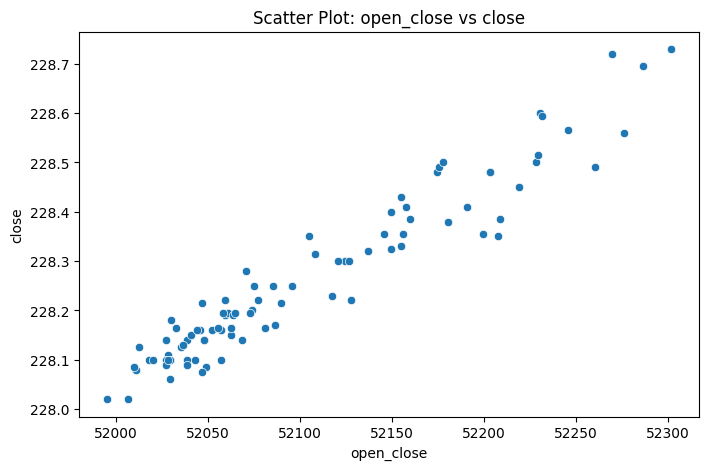

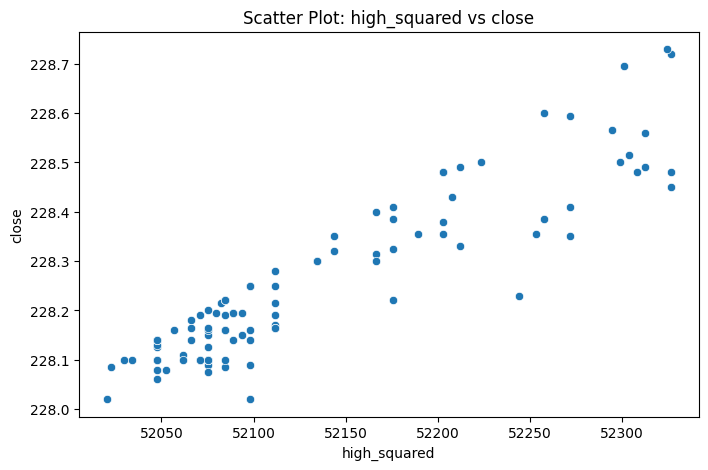

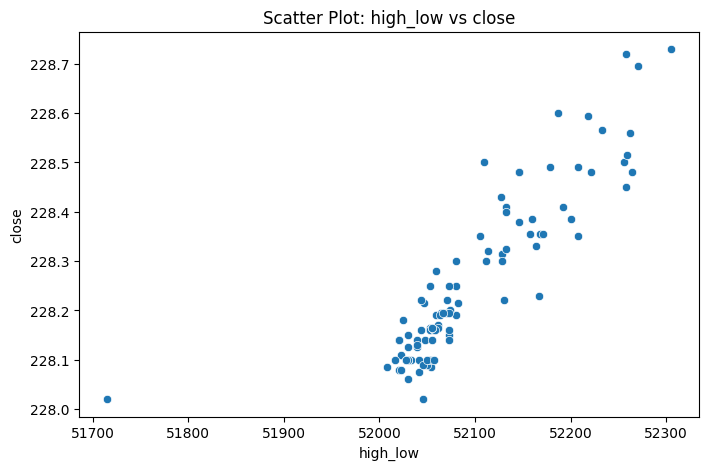

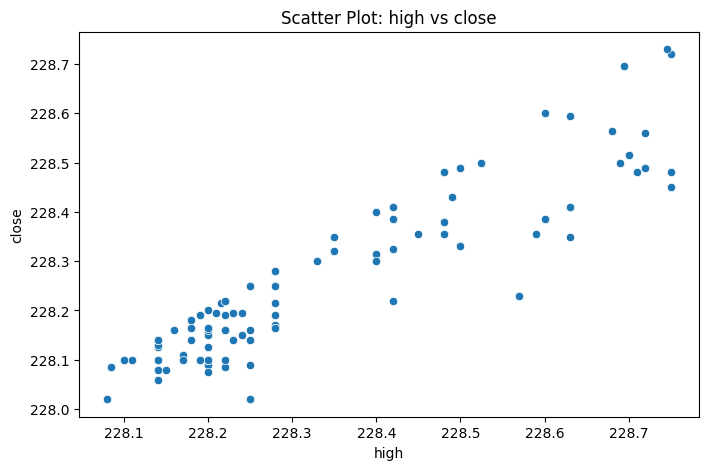

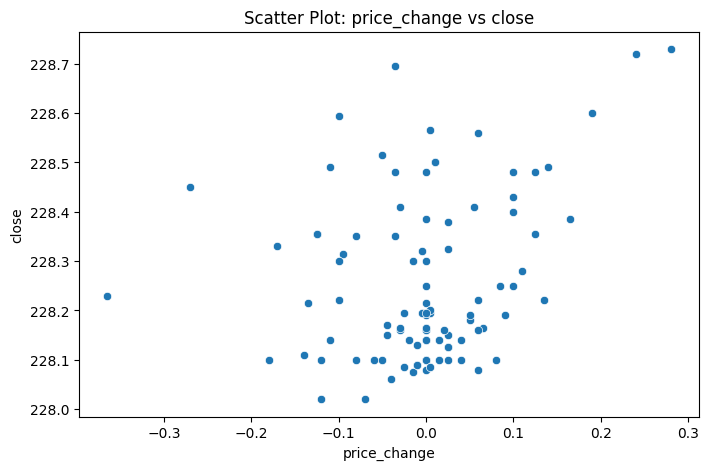

[Visualization] Creating heatmap for feature correlation...


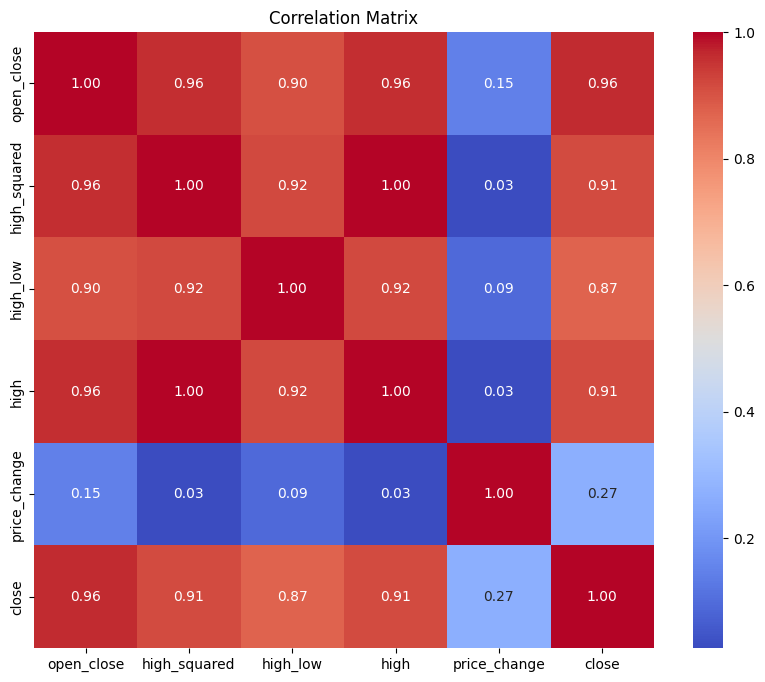

[Visualization] Creating feature importance bar plot...


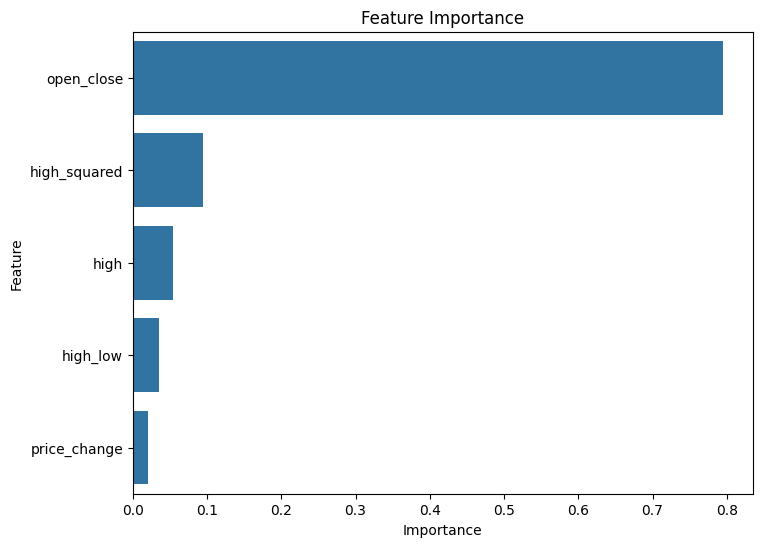

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for selected features vs. target
def scatter_plots(data, target_column):
    print("[Visualization] Creating scatter plots for selected features...")
    selected_features = [col for col in data.columns if col != target_column]
    for feature in selected_features:
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=data[feature], y=data[target_column])
        plt.title(f'Scatter Plot: {feature} vs {target_column}')
        plt.xlabel(feature)
        plt.ylabel(target_column)
        plt.show()

# Heatmap for correlation matrix
def heatmap_correlation(data):
    print("[Visualization] Creating heatmap for feature correlation...")
    corr_matrix = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

# Feature importance bar plot
def feature_importance_plot(data, target_column):
    print("[Visualization] Creating feature importance bar plot...")
    X = data.drop(columns=[target_column])
    y = data[target_column]
    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)

    # Extract feature importances
    importances = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Importance', y='Feature', data=importances)
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# Visualizing target predictability
scatter_plots(selected_data, target_column)
heatmap_correlation(selected_data)
feature_importance_plot(selected_data, target_column)


Selecting the best feature combination 

In [26]:
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
import numpy as np

# Your Alpha Vantage API Key
api_key = "NNIVHEQ1P9381USE"

# Specify the stock symbol (e.g., 'AAPL' for Apple)
symbol = 'AAPL'

# Make a request to Alpha Vantage to get intraday data (1-minute interval)
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval=1min&apikey={api_key}'
response = requests.get(url)
data = response.json()

# Check if the request was successful
if 'Time Series (1min)' in data:
    # Extract the data
    time_series = data['Time Series (1min)']

    # Convert the time series data to a pandas DataFrame
    df = pd.DataFrame.from_dict(time_series, orient='index')

    # Convert the columns to numeric values
    df = df.apply(pd.to_numeric)

    # Rename columns to match the expected feature names
    df.rename(columns={
        '1. open': 'open',
        '2. high': 'high',
        '3. low': 'low',
        '4. close': 'close',
        '5. volume': 'volume'
    }, inplace=True)

    # Add the required features
    df['price_change'] = df['close'].diff()
    df['volatility'] = df['high'] - df['low']
    df['daily_return'] = df['close'].pct_change()

    # Simulate a simple 'trend' (e.g., 1 if the daily return is positive, 0 if negative)
    df['trend'] = (df['daily_return'] > 0).astype(int)

    # Drop the first row since it has NaN values for the diff and pct_change columns
    df.dropna(inplace=True)

    # Display the final DataFrame
    print(df.head())

    # You can now use df as the featured_data in your pipeline
    featured_data = df
else:
    print("Error fetching data from Alpha Vantage. Please check your API key and symbol.")


# FeatureCombiner usage
class FeatureCombiner:
    def __init__(self, data):
        """
        Initialize with a DataFrame containing features.
        """
        self.data = data
        self.combined_features = None

    def create_interaction_features(self):
        """
        Create interaction features (e.g., open * close, high * low).
        """
        print("[Feature Combination] Creating interaction features...")
        self.data['open_close'] = self.data['open'] * self.data['close']
        self.data['high_low'] = self.data['high'] * self.data['low']
        print("[Feature Combination] Interaction features added: ['open_close', 'high_low']")
        return self.data

    def create_polynomial_features(self):
        """
        Create polynomial features (e.g., square of open, high, etc.).
        """
        print("[Feature Combination] Creating polynomial features...")
        self.data['open_squared'] = self.data['open'] ** 2
        self.data['high_squared'] = self.data['high'] ** 2
        self.data['low_squared'] = self.data['low'] ** 2
        print("[Feature Combination] Polynomial features added: ['open_squared', 'high_squared', 'low_squared']")
        return self.data

    def combine_features(self):
        """
        Combine interaction and polynomial features.
        """
        print("[Feature Combination] Combining features...")
        self.create_interaction_features()
        self.create_polynomial_features()
        self.combined_features = self.data
        print("[Feature Combination] Features combined.")
        return self.combined_features


# FeatureSelector usage
class FeatureSelector:
    def __init__(self, data):
        """
        Initialize with a DataFrame containing features and target.
        """
        self.data = data
        self.selected_features = None

    def variance_threshold_selector(self, threshold=0.01):
        """
        Removes features with low variance.
        """
        print("[Feature Selection] Removing low-variance features...")
        selector = VarianceThreshold(threshold=threshold)
        reduced_data = selector.fit_transform(self.data)
        kept_columns = self.data.columns[selector.get_support()]
        print(f"[Feature Selection] Features retained after variance threshold: {list(kept_columns)}")
        return self.data[kept_columns]

    def correlation_filter(self, target_column, threshold=0.75):
        """
        Removes features highly correlated with each other or the target.
        """
        print("[Feature Selection] Analyzing correlations...")
        corr_matrix = self.data.corr()

        # Correlation with the target column
        target_corr = corr_matrix[target_column].abs().sort_values(ascending=False)
        print("[Feature Selection] Correlation with Target:")
        print(target_corr)

        # Remove features with high correlation with others (above the threshold)
        high_corr_features = set()
        for i in corr_matrix.columns:
            for j in corr_matrix.columns:
                if i != j and abs(corr_matrix.loc[i, j]) > threshold:
                    high_corr_features.add(j)

        kept_features = [col for col in self.data.columns if col not in high_corr_features]
        print(f"[Feature Selection] Features retained after correlation filter: {kept_features}")
        return self.data[kept_features]

    def feature_importance(self, target_column, n_features=5):
        """
        Selects top features based on importance from a RandomForest model.
        """
        print("[Feature Selection] Evaluating with RandomForest...")
        X = self.data.drop(columns=[target_column])
        y = self.data[target_column]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor(random_state=42)
        model.fit(X_train, y_train)

        # Extract feature importances
        importances = pd.DataFrame({
            'Feature': X.columns,
            'Importance': model.feature_importances_
        }).sort_values(by='Importance', ascending=False)

        print("[Feature Selection] Feature Importance Ranking:")
        print(importances)

        # Select top features
        top_features = importances.head(n_features)["Feature"].tolist()
        print(f"[Feature Selection] Top {n_features} features: {top_features}")
        return self.data[top_features + [target_column]]

    def run_all(self, target_column):
        """
        Runs all feature selection strategies sequentially.
        """
        print("[Feature Selection Pipeline] Starting...")
        # Step 1: Variance Threshold
        filtered_data = self.variance_threshold_selector()
        # Step 2: Correlation Filter
        filtered_data = self.correlation_filter(target_column, threshold=0.75)
        # Step 3: Feature Importance
        final_data = self.feature_importance(target_column, n_features=5)
        print("[Feature Selection Pipeline] Completed.")
        self.selected_features = final_data.columns
        return final_data


# Running the pipeline
if __name__ == "__main__":
    target_column = "close"  # Define the target column for feature selection
    feature_combiner = FeatureCombiner(featured_data)
    combined_data = feature_combiner.combine_features()

    fs = FeatureSelector(combined_data)
    selected_data = fs.run_all(target_column)
    
    print("\n[Final Selected Data]")
    print(selected_data.head())



                        open    high     low   close  volume  price_change  \
2024-11-19 19:58:00  228.495  228.63  228.28  228.41     110         -0.03   
2024-11-19 19:57:00  228.480  228.60  228.29  228.60     115          0.19   
2024-11-19 19:56:00  228.720  228.72  228.26  228.49     111         -0.11   
2024-11-19 19:55:00  228.570  228.69  228.50  228.50     771          0.01   
2024-11-19 19:54:00  228.720  228.72  228.50  228.56      13          0.06   

                     volatility  daily_return  trend  
2024-11-19 19:58:00        0.35     -0.000131      0  
2024-11-19 19:57:00        0.31      0.000832      1  
2024-11-19 19:56:00        0.46     -0.000481      0  
2024-11-19 19:55:00        0.19      0.000044      1  
2024-11-19 19:54:00        0.22      0.000263      1  
[Feature Combination] Combining features...
[Feature Combination] Creating interaction features...
[Feature Combination] Interaction features added: ['open_close', 'high_low']
[Feature Combination] Cre